### installation

In [390]:
#!pip install scikit-learn

In [391]:
#conda install -c conda-forge pycaret

### Imports

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset
df = pd.read_csv('../data/processed/cleaned_data_Namrata_NAN.csv')

In [394]:
df = df.drop(['buy_price', 'rent_price'], axis=1)

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21305 entries, 0 to 21304
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sq_mt_built                   21305 non-null  float64
 1   n_rooms                       21305 non-null  int64  
 2   n_bathrooms                   21305 non-null  float64
 3   is_exact_address_hidden       21305 non-null  int64  
 4   floor                         18841 non-null  object 
 5   is_floor_under                20187 non-null  float64
 6   is_rent_price_known           21305 non-null  int64  
 7   buy_price_by_area             21305 non-null  int64  
 8   is_buy_price_known            21305 non-null  int64  
 9   is_renewal_needed             21305 non-null  int64  
 10  is_new_development            20331 non-null  float64
 11  built_year                    9783 non-null   float64
 12  has_central_heating           13324 non-null  float64
 13  h

In [396]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

In [397]:
# Define features and target variable
X = df.drop('buy_price_by_area', axis=1)
y = df['buy_price_by_area']

In [398]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, ElasticNet


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category', 'bool']).columns

# Define preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Define preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])



# Initialize models
logistic_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

ridge_classifier_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RidgeClassifier())
])

lasso_logistic_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(penalty='l1', solver='saga'))
])

elastic_net_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ElasticNet())
])

# Train and evaluate


In [399]:
numerical_features

Index(['sq_mt_built', 'n_rooms', 'n_bathrooms', 'is_exact_address_hidden',
       'is_floor_under', 'is_rent_price_known', 'is_buy_price_known',
       'is_renewal_needed', 'is_new_development', 'built_year',
       'has_central_heating', 'has_individual_heating', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_terrace',
       'has_storage_room', 'has_parking', 'is_parking_included_in_price',
       'parking_price', 'is_orientation_north', 'is_orientation_west',
       'is_orientation_south', 'is_orientation_east'],
      dtype='object')

In [400]:
categorical_features

Index(['floor', 'energy_certificate', 'neighborhood', 'District', 'HouseType'], dtype='object')

In [401]:
from pycaret.regression import *

In [402]:
print(df.dtypes)

sq_mt_built                     float64
n_rooms                           int64
n_bathrooms                     float64
is_exact_address_hidden           int64
floor                            object
is_floor_under                  float64
is_rent_price_known               int64
buy_price_by_area                 int64
is_buy_price_known                int64
is_renewal_needed                 int64
is_new_development              float64
built_year                      float64
has_central_heating             float64
has_individual_heating          float64
has_ac                          float64
has_fitted_wardrobes            float64
has_lift                        float64
is_exterior                     float64
has_terrace                     float64
has_storage_room                float64
energy_certificate               object
has_parking                       int64
is_parking_included_in_price    float64
parking_price                   float64
is_orientation_north            float64


In [403]:
#categorical_columns = [
#    'is_floor_under', 'is_new_development', 'has_central_heating', 
#    'has_lift', 'is_exterior', 'is_orientation_north', 
#    'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 
#    'is_orientation_west', 'is_orientation_south', 'energy_certificate',
#    'is_orientation_east', 'neighborhood', 'District', 'HouseType'
#]
#for col in categorical_columns:
#    df[col] = df[col].astype('category')
#print(df.dtypes)

In [405]:
# Setup the environment in PyCaret
regression_setup = setup(
    data=df,
    target = 'buy_price_by_area',
    session_id=10,
    )

,Description,Value
0,Session id,10
1,Target,buy_price_by_area
2,Target type,Regression
3,Original data shape,"(21305, 31)"
4,Transformed data shape,"(21305, 83)"
5,Transformed train set shape,"(14913, 83)"
6,Transformed test set shape,"(6392, 83)"
7,Numeric features,25
8,Categorical features,5
9,Rows with missing values,97.9%


In [406]:
# compare baseline models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,554.5353,725898.0995,851.3644,0.8022,0.1905,0.1448,0.9000
lightgbm,Light Gradient Boosting Machine,592.0007,770533.6589,877.1239,0.7900,0.1964,0.1538,0.5590
et,Extra Trees Regressor,577.4173,805895.1960,897.0253,0.7803,0.1990,0.1501,0.9190
gbr,Gradient Boosting Regressor,646.7623,898374.0445,947.1947,0.7552,0.2115,0.1685,0.2220
lr,Linear Regression,701.8817,1034808.1765,1016.4015,0.7181,0.2336,0.1843,0.3180
ridge,Ridge Regression,701.8033,1035684.2508,1016.8392,0.7179,0.2335,0.1842,0.0240
br,Bayesian Ridge,701.5303,1037045.5022,1017.4980,0.7175,0.2319,0.1839,0.0380
lasso,Lasso Regression,701.9537,1039234.2044,1018.5722,0.7169,0.2313,0.1838,0.0480
llar,Lasso Least Angle Regression,702.3237,1039654.2878,1018.7622,0.7168,0.2316,0.1839,0.0270
omp,Orthogonal Matching Pursuit,725.5323,1127653.2303,1060.9910,0.6929,0.2376,0.1894,0.0310


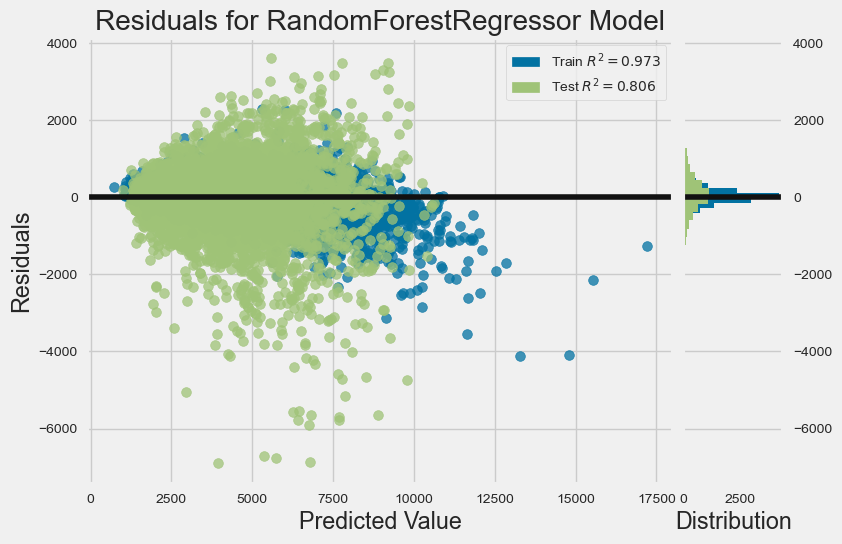

In [407]:
# plot residuals
plot_model(best_model, plot = 'residuals')

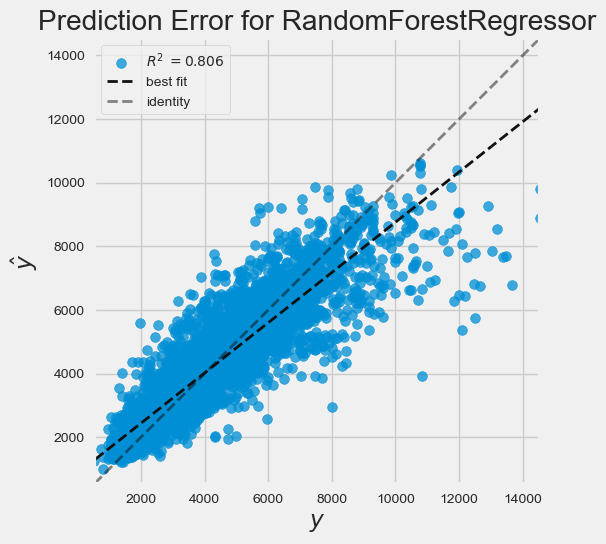

In [408]:
# plot error
plot_model(best_model, plot = 'error')

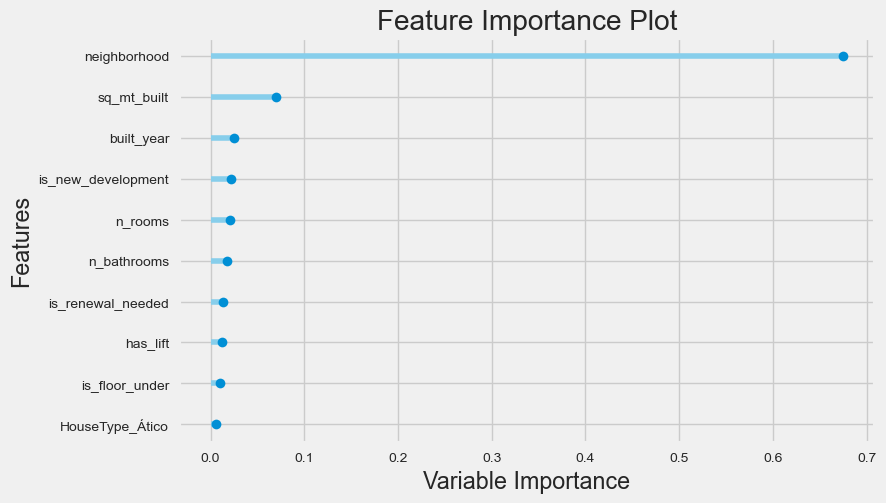

In [409]:
# plot feature importance
plot_model(best_model, plot = 'feature')

In [410]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…